# Lista de exercícios 1B – Sistemas digitais (resolução)

**Definições das funções impseq, stepseq, sigadd, sigmult, sigshift, sigfold utilizadas nos códigos**

In [1]:
import numpy as np

def impseq(n0,n1,n2):

    #      Generates x(n) = delta(n-n0); n1 <= n <= n2
    #      ----------------------------------------------
    #      [x,n] = impseq(n0,n1,n2)
    #

    n=np.array(range(n1,n2+1))
    x = n-n0
    for i in range(len(x)):
        if x[i]!=0: x[i]=0
        else: x[i]=1
    #x = (n-n0) == 0
    return [x,n]

def stepseq(n0,n1,n2):
    #     Generates x(n) = u(n-n0); n1 <= n <= n2
    #     ------------------------------------------
    #     [x,n] = stepseq(n0,n1,n2)
    #
    n=np.arange(n1,n2+1)
    x = n-n0
    for i in range(len(x)):
        if x[i]<0: x[i]=0
        else: x[i]=1
    #x = [(n-n0) >= 0]
    return [x,n]

def  sigadd(x1,n1,x2,n2):
    # % implements y(n) = x1(n)+x2(n)
    # % -----------------------------
    # % [y,n] = sigadd(x1,n1,x2,n2)
    # % y = sum sequence over n, which includes n1 and n2
    # % x1 = first sequence over n1
    # % x2 = second sequence over n2 (n2 can be different from n1)
    # %
    n = np.arange(min(n1.min(0),n2.min(0)),max(n1.max(0),n2.max(0))+1) # duration of y(n)
    y1 = np.zeros((1,len(n)))  #initialization
    y1=y1[0,:]
    y2 = y1.copy()
    y1[np.nonzero(np.logical_and((n>=n1.min(0)),(n<=n1.max(0)))==1)]=x1.copy()
    y2[np.nonzero(np.logical_and((n>=n2.min(0)),(n<=n2.max(0)))==1)]=x2.copy()
    y = y1+y2;
    return [y,n]


def  sigmult(x1,n1,x2,n2):
    # % implements y(n) = x1(n)*x2(n)
    # % -----------------------------
    # % [y,n] = sigmult(x1,n1,x2,n2)
    # % y = product sequence over n, which includes n1 and n2
    # % x1 = first sequence over n1
    # %
    n = np.arange(min(n1.min(0),n2.min(0)),max(n1.max(0),n2.max(0))+1) # duration of y(n)
    y1 = np.zeros((1,len(n)))  #initialization
    y1=y1[0,:]
    y2 = y1.copy()
    y1[np.nonzero(np.logical_and((n>=n1.min(0)),(n<=n1.max(0)))==1)]=x1.copy()
    y2[np.nonzero(np.logical_and((n>=n2.min(0)),(n<=n2.max(0)))==1)]=x2.copy()
    y = y1*y2
    return [y,n]


def sigshift(x,m,k):
    # % implements y(n) = x(n-k)
    # % -------------------------
    # % [y,n] = sigshift(x,m,k)
    # %
    n = m+k
    y = x.copy()
    return [y,n]


def sigfold(x,n):
    # % implements y(n) = x(-n)
    # % -----------------------
    # % [y,n] = sigfold(x,n)
    # %
    y = np.flip(x)
    n = -np.flip(n)
    return [y,n]

def conv_m(x,nx,h,nh):
    # Modified convolution routine for signal processing
    # --------------------------------------------------
    # [y,ny] = conv_m(x,nx,h,nh)
    # [y,ny] = convolution result
    # [x,nx] = first signal
    # [h,nh] = second signal
    #
    nyb = nx[0]+nh[0]
    nye = nx[len(x)-1] + nh[len(h)-1]
    ny = np.arange(nyb,nye+1)
    y = np.convolve(x,h)
    return [y,ny]


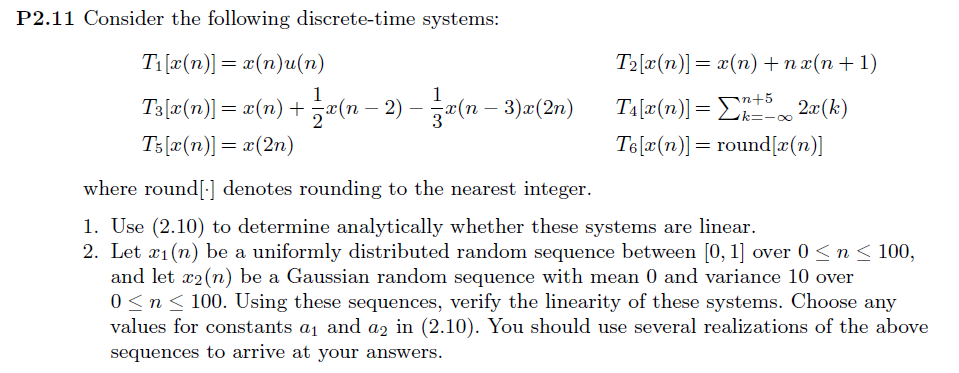

In [5]:
#Exercicio P2.11

import matplotlib.pyplot as plt
#from fDSP import impseq,stepseq,sigadd,sigmult,sigshift,sigfold
import numpy as np

n=np.array(range(101))
x1=np.random.rand(len(n))
x2=np.sqrt(10)*np.random.randn(len(n))

# a) y[n] = x[n]*u[n]

[u,n]=stepseq(0,0,100)
y1=x1*u
y2=x2*u

y=(x1+x2)*u

diff = sum (abs(y - (y1 + y2)))

if diff < 1e-5:
    print(' **** Sistema é linear ***')
else:
    print(' **** Sistema não é linear ***')


# b) y[n] = x[n] + n.x[n+1]

[x1d,n1d]=sigshift(x1,n,-1)
[x11,n11]=sigmult(x1d,n1d,n,n)
[y1,ny1]=sigadd(x1,n,x11,n11)

[x2d,n2d]=sigshift(x2,n,-1)
[x21,n21]=sigmult(x2d,n2d,n,n)
[y2,ny2]=sigadd(x2,n,x21,n21)

[yt,nyt]=sigadd(y1,ny1,y2,ny2)

x=x1+x2
[xd,nd]=sigshift(x,n,-1)
[xd1,nd1]=sigmult(xd,nd,n,n)
[y,ny]=sigadd(x,n,xd1,nd1)

[v_diff,nv]=sigadd(yt,nyt,-y,ny)
diff = sum (abs(v_diff))

if diff < 1e-5:
    print(' **** Sistema é linear ***')
else:
    print(' **** Sistema não é linear ***')


# c) y[n] = x[n] + (1/2)x[n-2]-(1/3)x[n-3].x[2n]

[x1d,n1d]=sigshift(x1,n,2)
x1_2n=x1[::2]
n_2n=np.array(range(len(x1_2n)))
[x1d2,n1d2]=sigshift(x1,n,3)

print(n_2n)
print(n1d2)

[x11,n11]=sigmult((1/3)*x1d2,n1d2,x1_2n,n_2n)

print(n11)
print(x11)

[x111,n111]=sigadd(x1,n,(1/2)*x1d,n1d)
[y1,ny1]=sigadd(x111,n111,-x11,n11)

[x2d,n2d]=sigshift(x2,n,2)
x2_2n=x2[::2]
[x2d2,n2d2]=sigshift(x2,n,3)
[x21,n21]=sigmult((1/3)*x2d2,n2d2,x2_2n,n_2n)
[x211,n211]=sigadd(x2,n,(1/2)*x2d,n2d)
[y2,ny2]=sigadd(x211,n211,-x21,n21)

[yt,nyt]=sigadd(y1,ny1,y2,ny2)

x=x1+x2
[xd,nd]=sigshift(x,n,2)
x_2n=x[::2]
[xd2,nd2]=sigshift(x,n,3)
[x31,n31]=sigmult((1/3)*xd2,nd2,x_2n,n_2n)
[x311,n311]=sigadd(x,n,(1/2)*xd,nd)
[y,ny]=sigadd(x311,n311,-x31,n31)

[v_diff,nv]=sigadd(yt,nyt,-y,ny)
diff = sum (abs(v_diff))

if diff < 1e-5:
    print(' **** Sistema é linear ***')
else:
    print(' **** Sistema não é linear ***')


# d) y[n] = soma (2.x[k]), com k=-inf a n+5

y1=np.convolve(x1,np.ones(101))
y1=2*y1[0:101]
ny=np.array(range(-5,96))

y2=np.convolve(x2,np.ones(101))
y2=2*y2[0:101]

[yt,nyt]=sigadd(y1,ny,y2,ny)

x=x1+x2
y=np.convolve(x,np.ones(101))
y=2*y[0:101]

[v_diff,nv]=sigadd(yt,nyt,-y,ny)
diff = sum (abs(v_diff))

if diff < 1e-5:
    print(' **** Sistema é linear ***')
else:
    print(' **** Sistema não é linear ***')


# e) y[n] = x[2n]

y1=x1[::2]
ny1=np.array(range(len(y1)))

y2=x2[::2]
ny2=np.array(range(len(y2)))

[yt,nyt]=sigadd(y1,ny1,y2,ny2)

x=x1+x2
y=x[::2]
ny=np.array(range(len(y)))

[v_diff,nv]=sigadd(yt,nyt,-y,ny)
diff = sum (abs(v_diff))

if diff < 1e-5:
    print(' **** Sistema é linear ***')
else:
    print(' **** Sistema não é linear ***')


# f) y[n] = round{x[n]}

y1=np.round(x1)
y2=np.round(x2)

[yt,nyt]=sigadd(y1,n,y2,n)

x=x1+x2
y=np.round(x)

[v_diff,nv]=sigadd(yt,nyt,-y,n)
diff = sum (abs(v_diff))

if diff < 1e-5:
    print(' **** Sistema é linear ***')
else:
    print(' **** Sistema não é linear ***')

 **** Sistema é linear ***
 **** Sistema é linear ***
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]
[  3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92 

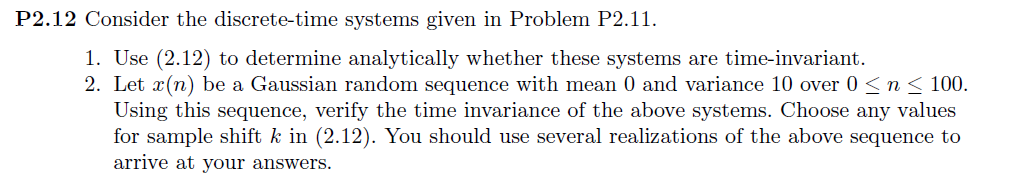

In [3]:
# Exercicio P2.12

import matplotlib.pyplot as plt
#from fDSP import impseq,stepseq,sigadd,sigmult,sigshift,sigfold
import numpy as np

n=np.array(range(101))
x=np.sqrt(10)*np.random.randn(len(n))

# a) y[n] = x[n]*u[n]

[u,nu]=stepseq(0,0,100)
y=x*u
[y1,ny1]=sigshift(y,n,1) #y[n-1]

[x1,nx1]=sigshift(x,n,1) #x[n-1]
[y2,ny2]=sigmult(x1,nx1,u,nu) #T{x[n-1]}

[diff,ndiff]=sigadd(y1,ny1,-y2,ny2)
diff=sum(abs(diff))

if diff < 1e-5:
    print(' **** Sistema é Invariante no Tempo ***')
else:
    print(' **** Sistema não é Invariante no Tempo ***')

# b) y[n] = x[n] + n.x[n+1]

[xd,nd]=sigshift(x,n,-1)
[xd1,nd1]=sigmult(xd,nd,n,n)
[y,ny]=sigadd(x,n,xd1,nd1)
[y1,ny1]=sigshift(y,ny,1) #y[n-1]

[x1,nx1]=sigshift(x,n,1) #x[n-1]
[x1d,nx1d]=sigshift(x1,nx1,-1)
[x1d1,nx1d1]=sigmult(x1d,nx1d,n,n)
[y2,ny2]=sigadd(x1,n,x1d1,nx1d1) #T{x[n-1]}

[diff,ndiff]=sigadd(y1,ny1,-y2,ny2)
diff=sum(abs(diff))

if diff < 1e-5:
    print(' **** Sistema é Invariante no Tempo ***')
else:
    print(' **** Sistema não é Invariante no Tempo ***')

# c) y[n] = x[n] + (1/2)x[n-2]-(1/3)x[n-3].x[2n]

x_2n=x[::2]
n_2n=np.array(range(len(x_2n)))
[xd2,nd2]=sigshift(x,n,3)
[xd3,nd3]=sigmult((1/3)*xd2,nd2,x_2n,n_2n)
[xd,nd]=sigshift(x,n,2)
[xd4,nd4]=sigadd(x,n,(1/2)*xd,nd)
[y,ny]=sigadd(xd4,nd4,-xd3,nd3)
[y1,ny1]=sigshift(y,ny,1) #y[n-1]

[x1,nx1]=sigshift(x,n,1) #x[n-1]
x1_2n=x1[1::2]
n1_2n=np.array(range(len(x1_2n)))
[x1d2,n1d2]=sigshift(x1,nx1,3)
[x1d3,n1d3]=sigmult((1/3)*x1d2,n1d2,x1_2n,n1_2n)
[x1d,n1d]=sigshift(x1,nx1,2)
[x1d4,n1d4]=sigadd(x1,nx1,(1/2)*x1d,n1d)
[y2,ny2]=sigadd(x1d4,n1d4,-x1d3,n1d3) #T{x[n-1]}

[diff,ndiff]=sigadd(y1,ny1,-y2,ny2)
diff=sum(abs(diff))

if diff < 1e-5:
    print(' **** Sistema é Invariante no Tempo ***')
else:
    print(' **** Sistema não é Invariante no Tempo ***')

# d) y[n] = soma (2.x[k]), com k=-inf a n+5


y=np.convolve(x,np.ones(101))
y=2*y[0:101]
ny=np.array(range(-5,96))

[y1,ny1]=sigshift(y,ny,1) #y[n-1]

[x1,nx1]=sigshift(x,n,1) #x[n-1]

y2=np.convolve(x1,np.ones(101))
y2=2*y2[0:101]
ny2=np.array(range(-4,97))   #T{x[n-1]}

[diff,ndiff]=sigadd(y1,ny1,-y2,ny2)
diff=sum(abs(diff))

if diff < 1e-5:
    print(' **** Sistema é Invariante no Tempo ***')
else:
    print(' **** Sistema não é Invariante no Tempo ***')

# e) y[n] = x[2n]

y=x[::2]
ny=np.array(range(len(y)))

[y1,ny1]=sigshift(y,ny,1)  #y[n-1]

[x1,nx1]=sigshift(x,n,1)  #x[n-1]

y2=x1[1::2]
ny2=np.array(range(len(y2)))  #T{x[n-1]}

[diff,ndiff]=sigadd(y1,ny1,-y2,ny2)
diff=sum(abs(diff))

if diff < 1e-5:
    print(' **** Sistema é Invariante no Tempo ***')
else:
    print(' **** Sistema não é Invariante no Tempo ***')


# f) y[n] = round{x[n]}

y=np.round(x)
ny=n
[y1,ny1]=sigshift(y,ny,1)  #y[n-1]

[x1,nx1]=sigshift(x,n,1) #x[n-1]
y2=np.round(x1)
ny2=nx1  #T{x[n-1]}

[diff,ndiff]=sigadd(y1,ny1,-y2,ny2)
diff=sum(abs(diff))

if diff < 1e-5:
    print(' **** Sistema é Invariante no Tempo ***')
else:
    print(' **** Sistema não é Invariante no Tempo ***')

 **** Sistema não é Invariante no Tempo ***
 **** Sistema não é Invariante no Tempo ***
 **** Sistema não é Invariante no Tempo ***
 **** Sistema é Invariante no Tempo ***
 **** Sistema não é Invariante no Tempo ***
 **** Sistema é Invariante no Tempo ***


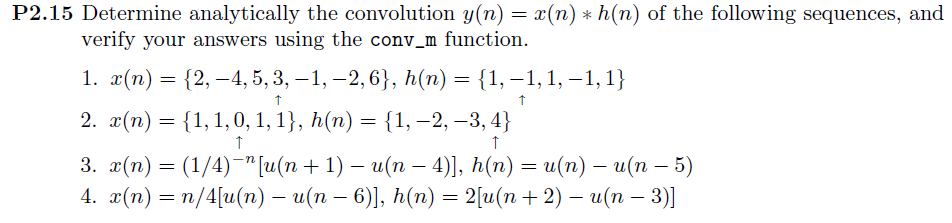

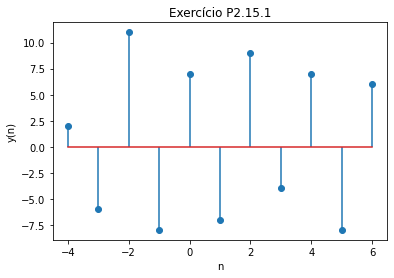

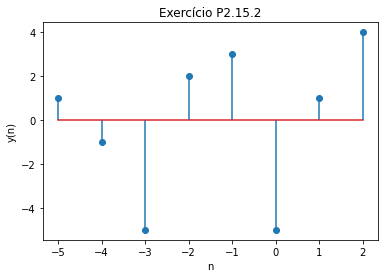

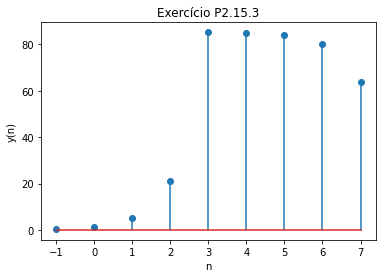

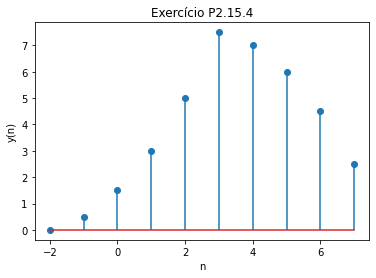

In [6]:
#Exercicio P2.15

import matplotlib.pyplot as plt
#from fDSP import impseq,stepseq,sigadd,sigmult,sigshift,sigfold,conv_m
import numpy as np

#1)

x=np.array([2,-4,5,3,-1,-2,6])
nx=np.arange(-3,4)
h=np.array([1,-1,1,-1,1])
nh=np.arange(-1,4)

[y,ny] = conv_m(x,nx,h,nh)

plt.figure()
plt.stem(ny,y)
plt.title("Exercício P2.15.1")
plt.xlabel('n')
plt.ylabel('y(n)')

#2)

x=np.array([1,1,0,1,1])
nx=np.arange(-2,3)
h=np.array([1,-2,-3,4])
nh=np.arange(-3,1)

[y,ny] = conv_m(x,nx,h,nh)
plt.figure()
plt.stem(ny,y)
plt.title("Exercício P2.15.2")
plt.xlabel('n')
plt.ylabel('y(n)')

#3)

nx=np.arange(-1,4)
x=(1/4)**(-nx)
h=np.ones(5)
nh=np.arange(5)

[y,ny] = conv_m(x,nx,h,nh)

plt.figure()
plt.stem(ny,y)
plt.title("Exercício P2.15.3")
plt.xlabel('n')
plt.ylabel('y(n)')

#4)

nx=np.arange(6)
x=nx/4
h=2*np.ones(5)
nh=np.arange(-2,3)

[y,ny] = conv_m(x,nx,h,nh)
plt.figure()
plt.stem(ny,y)
plt.title("Exercício P2.15.4")
plt.xlabel('n')
plt.ylabel('y(n)')

plt.show()

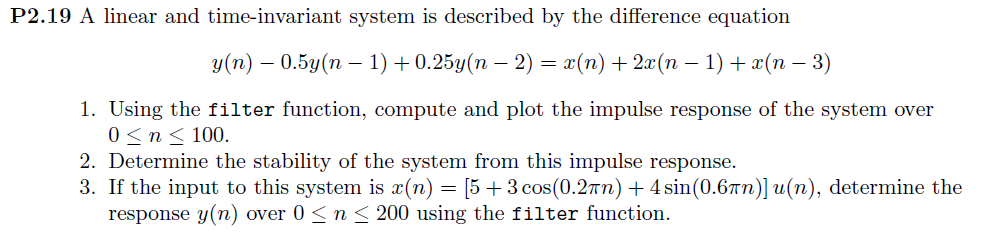

Sistema é estável, pois o somatório da saída é aproximadamente 5.857142857142858
Também porque as magnitudes dos polos são [0.5 0.5]


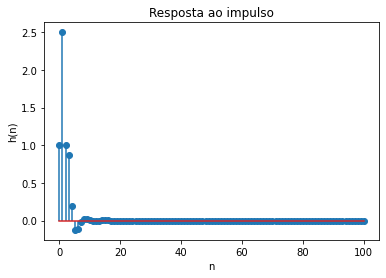

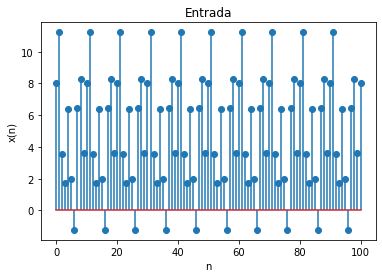

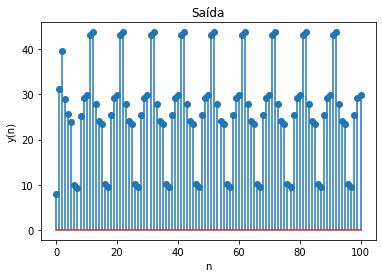

In [9]:
#Exercicio P2.19

import matplotlib.pyplot as plt
#from fDSP import impseq,stepseq,sigadd,sigmult,sigshift,sigfold,conv_m
import numpy as np
from scipy import signal

a=np.array([1,-0.5,0.25])
b=np.array([1, 2, 0, 1])

# 1)

[x,n]=impseq(0,0,100)
h=signal.lfilter(b,a,x)

plt.figure()
plt.stem(n,h)
plt.title("Resposta ao impulso")
plt.xlabel('n')
plt.ylabel('h(n)')


# 2)

print("Sistema é estável, pois o somatório da saída é aproximadamente",sum(abs(h)))
z=np.roots(a)
print("Também porque as magnitudes dos polos são",abs(z))

# 3)

n = np.arange(101)
x = 5 + 3*np.cos(0.2*np.pi*n) + 4*np.sin(0.6*np.pi*n)

plt.figure()
plt.stem(n,x)
plt.title("Entrada")
plt.xlabel('n')
plt.ylabel('x(n)')

y=signal.lfilter(b,a,x)

plt.figure()
plt.stem(n,y)
plt.title("Saída")
plt.xlabel('n')
plt.ylabel('y(n)')

plt.show()